In [ ]:
from scipy import stats
import arviz as az
import random
from random import choice, choices, shuffle, sample
from itertools import combinations, groupby
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
import sklearn
from sklearn import preprocessing
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#pd.set_option("display.max_rows", None, "display.max_columns", None)
print('Running on PyMC3 v{}'.format(pm.__version__))
import networkx as nx
from IPython.display import display, HTML
!pip install table-evaluator==1.2.2.post1
from table_evaluator import load_data, TableEvaluator
from sklearn.decomposition import PCA

# generate network

#### small_sized

In [ ]:
def small_sized():

  degreedist = random.choice(['HD','Norm'])
  if degreedist=='HD':
    high_hub=True
    Norm_hub=False
  else:
    high_hub=False
    Norm_hub=True

  if high_hub:

    while True:
      # random pick network to generate from synthetic dataset
      our_choice = random.choice(df2.index)
      extreme_range = True

      interval=df2.no_of_nodes[our_choice]*0.3
      low=df2.no_of_nodes[our_choice]-interval
      high=df2.no_of_nodes[our_choice]

      #get similar degree distribution
      df_degreedistribution=df[(low<=df.no_of_nodes) & (df.no_of_nodes<=high)]           

      #get similar average degree 
      index_degree=[]
      our_degree = df2.average_degree[our_choice]
      for index in df_degreedistribution.index:
        if (our_degree-2 > df_degreedistribution['average_degree'][index]) | ( df_degreedistribution['average_degree'][index] > our_degree+2):
          index_degree.append(index)
      df_degreedistribution = df_degreedistribution.drop(index_degree)

      #filter based on high difference of max degree threshold
      index_degree2=[]
      for index in df_degreedistribution.index:
        if (df_degreedistribution.no_of_nodes[index]-max(df_degreedistribution.degree_of_nodes[index]))/df_degreedistribution.no_of_nodes[index]>0.2:
          index_degree2.append(index)
      if len(index_degree2)>0:
        break

    all_degrees=[]
    for indexx in index_degree2:
      for degreee in df_degreedistribution.degree_of_nodes[indexx]:
        all_degrees.append(degreee)

    #define measurement based networks
    change_range = True
    edge_corners=df2.no_of_edges[our_choice]*2
    syn_nodes=int(df2.no_of_nodes[our_choice])
    cluster_coef = round(df2.average_clustering_coefficient[our_choice],2)
    dia = df2.diameter[our_choice]

    threshold=0
    while True:
      threshold+=1
      if threshold>=100000:
        break
      nodes_degree_list=choices(all_degrees,k=syn_nodes)
      #constraint on average degree
      if edge_corners-10<=sum(nodes_degree_list)<=edge_corners+10:
        try:
          sort_degree_list=sorted(nodes_degree_list,reverse=True) 
          #generate havel hakimi network from sampled degree distribution
          g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
          components = dict(enumerate(nx.connected_components(g)))
          if len(components)>5:
            continue
          else:
            #reducing components
            for f in range(len(components)-1):
              for target in list(components[f+1]):
                source = random.choice(list(components[0])[:5])
                g.add_edge(source, target)     

            G=[g.subgraph(c).copy() for c in sorted(nx.connected_components(g), key=len, reverse=True)][0]
            #constraint on average clustering coefficient
            if cluster_coef-0.01<=round((nx.average_clustering(G)),2)<=cluster_coef+0.01:
              if nx.diameter(G)<=dia:
                change_range=False
                extreme_range=False
                break
              else:
                continue 
            else:
              continue
        except:
          continue

    if extreme_range:
      
      interval=df2.no_of_nodes[our_choice]*0.3
      low=df2.no_of_nodes[our_choice]-interval
      high=df2.no_of_nodes[our_choice]

      #get similar degree distribution
      df_degreedistribution=df[(low<=df.no_of_nodes) & (df.no_of_nodes<=high)]           

      #get similar average degree 
      index_degree=[]
      our_degree = df2.average_degree[our_choice]
      for index in df_degreedistribution.index:
        if (our_degree-2 > df_degreedistribution['average_degree'][index]) | ( df_degreedistribution['average_degree'][index] > our_degree+2):
          index_degree.append(index)
      df_degreedistribution = df_degreedistribution.drop(index_degree)

      #filter based on high difference of max degree threshold
      index_degree2=[]
      for index in df_degreedistribution.index:
        if (df_degreedistribution.no_of_nodes[index]-max(df_degreedistribution.degree_of_nodes[index]))/df_degreedistribution.no_of_nodes[index]>0.1:
          index_degree2.append(index)

      all_degrees=[]
      for indexx in index_degree2:
        for degreee in df_degreedistribution.degree_of_nodes[indexx]:
          all_degrees.append(degreee)

      #define measurement based networks
      edge_corners=df2.no_of_edges[our_choice]*2
      syn_nodes=int(df2.no_of_nodes[our_choice])
      cluster_coef = round(df2.average_clustering_coefficient[our_choice],2)
      dia = df2.diameter[our_choice]

      threshold=0
      while extreme_range:
        threshold+=1
        if threshold>=100000:
          Norm_hub=True
          break
        nodes_degree_list=choices(all_degrees,k=syn_nodes)
        #constraint on average degree
        if edge_corners-10<=sum(nodes_degree_list)<=edge_corners+10:
          try:
            sort_degree_list=sorted(nodes_degree_list,reverse=True) 
            #generate havel hakimi network from sampled degree distribution
            g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
            components = dict(enumerate(nx.connected_components(g)))
            if len(components)>8:
              continue
            else:
              #reducing components
              for f in range(len(components)-1):
                for target in list(components[f+1]):
                  source = random.choice(list(components[0])[:3])
                  g.add_edge(source, target)     

              G=[g.subgraph(c).copy() for c in sorted(nx.connected_components(g), key=len, reverse=True)][0]
              #constraint on average clustering coefficient
              if cluster_coef-0.1<=round((nx.average_clustering(G)),2)<=cluster_coef+0.1:
                if nx.diameter(G)<=dia:
                  change_range=False
                  extreme_range=False
                  break
                else:
                  continue 
              else:
                continue
          except:
            continue      
  

  if Norm_hub:
 
    while True:
      # random pick network to generate from synthetic dataset
      our_choice = random.choice(df2.index)
      extreme_range = True

      interval=df2.no_of_nodes[our_choice]*0.3
      low=df2.no_of_nodes[our_choice]-interval
      high=df2.no_of_nodes[our_choice]

      #get similar degree distribution
      df_degreedistribution=df[(low<=df.no_of_nodes) & (df.no_of_nodes<=high)]           

      #get similar average degree 
      index_degree=[]
      our_degree = df2.average_degree[our_choice]
      for index in df_degreedistribution.index:
        if (our_degree-2 > df_degreedistribution['average_degree'][index]) | ( df_degreedistribution['average_degree'][index] > our_degree+2):
          index_degree.append(index)
      df_degreedistribution = df_degreedistribution.drop(index_degree)

      if len(df_degreedistribution.iloc[:,:4])>0:
        break

    all_degrees=[]
    for indexx in df_degreedistribution.index:
      for degreee in df_degreedistribution.degree_of_nodes[indexx]:
        all_degrees.append(degreee)

    #define measurement based networks
    change_range = True
    edge_corners=df2.no_of_edges[our_choice]*2
    syn_nodes=int(df2.no_of_nodes[our_choice])
    cluster_coef = round(df2.average_clustering_coefficient[our_choice],2)
    dia = df2.diameter[our_choice]

    threshold=0
    while True:
      threshold+=1
      if threshold>=10000:
        break
      nodes_degree_list=choices(all_degrees,k=syn_nodes)
      #constraint on average degree
      if edge_corners-10<=sum(nodes_degree_list)<=edge_corners+10:
        try:
          sort_degree_list=sorted(nodes_degree_list,reverse=True) 
          #generate havel hakimi network from sampled degree distribution
          g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
          components = dict(enumerate(nx.connected_components(g)))
          if len(components)>1:
            continue
          else:
            G=[g.subgraph(c).copy() for c in sorted(nx.connected_components(g), key=len, reverse=True)][0]
            #constraint on average clustering coefficient
            if cluster_coef-0.01<=round((nx.average_clustering(G)),2)<=cluster_coef+0.01:
              if (dia-1)<=nx.diameter(G)<=dia:
                change_range=False
                extreme_range=False
                break
              else:
                continue 
            else:
              continue
        except:
          continue

    threshold=0
    while change_range:
      threshold+=1
      if threshold>=10000:
        break
      nodes_degree_list=choices(all_degrees,k=syn_nodes)
      if edge_corners-30<=sum(nodes_degree_list)<=edge_corners+30:
        try:
          sort_degree_list=sorted(nodes_degree_list,reverse=True)
          g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
          components = dict(enumerate(nx.connected_components(g)))
          if len(components)>1:
            continue
          else:
            G=[g.subgraph(c).copy() for c in sorted(nx.connected_components(g), key=len, reverse=True)][0]
            if cluster_coef-0.02<=round((nx.average_clustering(G)),2)<=cluster_coef+0.02:
              if (dia-1)<=nx.diameter(G)<=dia:
                change_range=False
                extreme_range=False
                break
              else:
                continue
            else:
              continue
        except:
          continue

    if extreme_range:
      interval=df2.no_of_nodes[our_choice]*0.5
      low=df2.no_of_nodes[our_choice]-interval
      high=df2.no_of_nodes[our_choice]

      df_degreedistribution=df[(low<=df.no_of_nodes) & (df.no_of_nodes<=high)]          

      all_degrees=[]
      for indexx in df_degreedistribution.index:
        for degreee in df_degreedistribution.degree_of_nodes[indexx]:
          all_degrees.append(degreee)
        
    threshold=0      
    while extreme_range:
      threshold+=1
      if threshold>=100000:
        print('graph generation failed! please try again')
        break 
      nodes_degree_list=choices(all_degrees,k=syn_nodes)
      if edge_corners-40<=sum(nodes_degree_list)<=edge_corners+40:
        try:
          sort_degree_list=sorted(nodes_degree_list,reverse=True) 
          g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
          components = dict(enumerate(nx.connected_components(g)))
          if len(components)>10:
            continue
          else:
            #reducing components here
            for f in range(len(components)-1):   
              source = list(components[0])[0]
              target = random.choice(list(components[f+1]))
              g.add_edge(source, target)
            G=[g.subgraph(c).copy() for c in sorted(nx.connected_components(g), key=len, reverse=True)][0]
            if cluster_coef-0.3<=round((nx.average_clustering(G)),2)<=cluster_coef+0.3:
              if nx.diameter(G)<=dia:
                change_range=False
                extreme_range=False
                break
              else:
                continue
            else:
              continue
        except:
          continue

  return G,df_degreedistribution,our_choice

#### medium_sized

In [ ]:
def medium_sized():

  degreedist = random.choice(['HD','Norm'])
  if degreedist=='HD':
    high_hub=True
    Norm_hub=False
  else:
    high_hub=False
    Norm_hub=True

  if high_hub:

    while True:
      # random pick network to generate from synthetic dataset
      our_choice = random.choice(df2.index)
      extreme_range = True

      interval=df2.no_of_nodes[our_choice]*0.3
      low=df2.no_of_nodes[our_choice]-interval
      high=df2.no_of_nodes[our_choice]

      #get similar degree distribution
      df_degreedistribution=df[(low<=df.no_of_nodes) & (df.no_of_nodes<=high)]           

      #get similar average degree 
      index_degree=[]
      our_degree = df2.average_degree[our_choice]
      for index in df_degreedistribution.index:
        if (our_degree-2 > df_degreedistribution['average_degree'][index]) | ( df_degreedistribution['average_degree'][index] > our_degree+2):
          index_degree.append(index)
      df_degreedistribution = df_degreedistribution.drop(index_degree)

      #filter based on high difference of max degree threshold
      index_degree2=[]
      for index in df_degreedistribution.index:
        if (df_degreedistribution.no_of_nodes[index]-max(df_degreedistribution.degree_of_nodes[index]))/df_degreedistribution.no_of_nodes[index]>0.2:
          index_degree2.append(index)
      if len(index_degree2)>0:
        break

    all_degrees=[]
    for indexx in index_degree2:
      for degreee in df_degreedistribution.degree_of_nodes[indexx]:
        all_degrees.append(degreee)

    #define measurement based networks
    change_range = True
    edge_corners=df2.no_of_edges[our_choice]*2
    syn_nodes=int(df2.no_of_nodes[our_choice])
    cluster_coef = round(df2.average_clustering_coefficient[our_choice],2)
    dia = df2.diameter[our_choice]

    threshold=0
    while True:
      threshold+=1
      if threshold>=100000:
        break
      nodes_degree_list=choices(all_degrees,k=syn_nodes)
      #constraint on average degree
      if edge_corners-20<=sum(nodes_degree_list)<=edge_corners+20:
        try:
          sort_degree_list=sorted(nodes_degree_list,reverse=True) 
          #generate havel hakimi network from sampled degree distribution
          g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
          components = dict(enumerate(nx.connected_components(g)))
          if len(components)>10:
            continue
          else:
            #reducing components
            for f in range(len(components)-1):
              for target in list(components[f+1]):
                source = random.choice(list(components[0])[:5])
                g.add_edge(source, target)     

            G=[g.subgraph(c).copy() for c in sorted(nx.connected_components(g), key=len, reverse=True)][0]
            #constraint on average clustering coefficient
            if cluster_coef-0.01<=round((nx.average_clustering(G)),2)<=cluster_coef+0.01:
              if nx.diameter(G)<=dia:
                change_range=False
                extreme_range=False
                break
              else:
                continue 
            else:
              continue
        except:
          continue

    threshold=0
    while change_range:
      threshold+=1
      if threshold>=10000:
        break
      nodes_degree_list=choices(all_degrees,k=syn_nodes)
      #constraint on average degree
      if edge_corners-20<=sum(nodes_degree_list)<=edge_corners+20:
        try:
          sort_degree_list=sorted(nodes_degree_list,reverse=True) 
          #generate havel hakimi network from sampled degree distribution
          g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
          components = dict(enumerate(nx.connected_components(g)))
          if len(components)>20:
            continue
          else:
            #reducing components
            for f in range(len(components)-1):
              for target in list(components[f+1]):
                source = random.choice(list(components[0])[:5])
                g.add_edge(source, target)     

            G=[g.subgraph(c).copy() for c in sorted(nx.connected_components(g), key=len, reverse=True)][0]
            #constraint on average clustering coefficient
            if cluster_coef-0.1<=round((nx.average_clustering(G)),2)<=cluster_coef+0.1:
              if nx.diameter(G)<=dia:
                change_range=False
                extreme_range=False
                break
              else:
                continue 
            else:
              continue
        except:
          continue

    threshold=0
    while extreme_range:
      threshold+=1
      if threshold>=100000:
        Norm_hub=True
        break
      nodes_degree_list=choices(all_degrees,k=syn_nodes)
      #constraint on average degree
      if edge_corners-20<=sum(nodes_degree_list)<=edge_corners+20:
        try:
          sort_degree_list=sorted(nodes_degree_list,reverse=True) 
          #generate havel hakimi network from sampled degree distribution
          g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
          components = dict(enumerate(nx.connected_components(g)))
          if len(components)>20:
            continue
          else:
            #reducing components
            for f in range(len(components)-1):
              for target in list(components[f+1]):
                source = random.choice(list(components[0])[:5])
                g.add_edge(source, target)     

            G=[g.subgraph(c).copy() for c in sorted(nx.connected_components(g), key=len, reverse=True)][0]
            #constraint on average clustering coefficient
            if cluster_coef-0.2<=round((nx.average_clustering(G)),2)<=cluster_coef+0.2:
              if nx.diameter(G)<=dia+1:
                change_range=False
                extreme_range=False
                break
              else:
                continue 
            else:
              continue
        except:
          continue

  if Norm_hub:
    while True:
      # random pick network to generate from synthetic dataset  
      our_choice = random.choice(df2.index)
      extreme_range = True

      interval=df2.no_of_nodes[our_choice]*0.3
      low=df2.no_of_nodes[our_choice]-interval
      high=df2.no_of_nodes[our_choice]

      #get similar degree distribution
      df_degreedistribution=df[(low<=df.no_of_nodes) & (df.no_of_nodes<=high)]          

      #get similar average degree 
      index_degree=[]
      our_degree = df2.average_degree[our_choice]
      for index in df_degreedistribution.index:
        if (our_degree-2 > df_degreedistribution['average_degree'][index]) | ( df_degreedistribution['average_degree'][index] > our_degree+2):
          index_degree.append(index)
      df_degreedistribution = df_degreedistribution.drop(index_degree)

      if len(df_degreedistribution.iloc[:,:4])>0:
        break

    all_degrees=[]
    for indexx in df_degreedistribution.index:
      for degreee in df_degreedistribution.degree_of_nodes[indexx]:
        all_degrees.append(degreee)
  
    #define measurement based networks
    change_range = True
    edge_corners=df2.no_of_edges[our_choice]*2
    syn_nodes=int(df2.no_of_nodes[our_choice])
    cluster_coef = round(df2.average_clustering_coefficient[our_choice],2)
    dia = df2.diameter[our_choice]

    threshold=0
    while True:
      threshold+=1
      if threshold>=10000:
        break
      nodes_degree_list=choices(all_degrees,k=syn_nodes)
        
      #constraint on average degree
      if edge_corners-20<=sum(nodes_degree_list)<=edge_corners+20:
        try:
          sort_degree_list=sorted(nodes_degree_list,reverse=True) 
          #generate havel hakimi network from sampled degree distribution
          g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
          components = dict(enumerate(nx.connected_components(g)))
          if len(components)>10:
            continue
          else:
            #reduce components
            for f in range(len(components)-1):   
              source = list(components[0])[0]
              target = random.choice(list(components[f+1]))
              g.add_edge(source, target)

            G=g 
            #constraint on average clustering coefficient
            if cluster_coef-0.01<=round((nx.average_clustering(G)),2)<=cluster_coef+0.01:
              if (dia-1)<=nx.diameter(G)<=dia:
                change_range=False
                extreme_range=False
                break
              else:
                continue
            else:
              continue
        except:
          continue

    threshold=0
    while change_range:
      threshold+=1
      if threshold>=10000:
        break
      nodes_degree_list=choices(all_degrees,k=syn_nodes)
      if edge_corners-30<=sum(nodes_degree_list)<=edge_corners+30:
        try:
          sort_degree_list=sorted(nodes_degree_list,reverse=True) 
          g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
          components = dict(enumerate(nx.connected_components(g)))
          if len(components)>10:
            continue
          else:
            #reduce components
            for f in range(len(components)-1):   
              source = list(components[0])[0]
              target = random.choice(list(components[f+1]))
              g.add_edge(source, target)
            G=g 
            if cluster_coef-0.1<=round((nx.average_clustering(G)),2)<=cluster_coef+0.1:
              if nx.diameter(G)<=dia:  
                change_range=False
                extreme_range=False
                break
              else:
                continue
            else:
              continue
        except:
          continue

    if extreme_range:
      
      interval=df2.no_of_nodes[our_choice]*0.3
      low=df2.no_of_nodes[our_choice]-interval
      high=df2.no_of_nodes[our_choice]

      df_degreedistribution=df[(low<=df.no_of_nodes) & (df.no_of_nodes<=high)]           

      all_degrees=[]
      for indexx in df_degreedistribution.index:
        for degreee in df_degreedistribution.degree_of_nodes[indexx]:
          all_degrees.append(degreee)
        
    threshold=0      
    while extreme_range:
      threshold+=1
      if threshold>=1000000:
        print('graph generation failed! please try again')
        break 
      nodes_degree_list=choices(all_degrees,k=syn_nodes)
      if edge_corners-50<=sum(nodes_degree_list)<=edge_corners+50:
        try:
          sort_degree_list=sorted(nodes_degree_list,reverse=True) 
          g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
          components = dict(enumerate(nx.connected_components(g)))
          if len(components)>30:
            continue
          else:
            #reduce components
            for f in range(len(components)-1):   
              source = list(components[0])[0]
              target = random.choice(list(components[f+1]))
              g.add_edge(source, target)
            G=g 
            if cluster_coef-0.3<=round((nx.average_clustering(G)),2)<=cluster_coef+0.3:
              if nx.diameter(G)<=dia+5:   
                change_range=False
                extreme_range=False
                break
              else:
                continue
            else:
              continue
        except:
          continue

  return G,df_degreedistribution,our_choice

#### large_sized



In [ ]:
def large_sized():

  degreedist = np.random.choice(['HD','Norm'],p=[0.3,0.7])
  if degreedist=='HD':
    high_hub=True
    Norm_hub=False
  else:
    high_hub=False
    Norm_hub=True
  
  if high_hub:
    while True:
      # random pick network to generate from synthetic dataset
      our_choice = random.choice(df2.index)
      extreme_range = True

      interval=df2.no_of_nodes[our_choice]*0.3
      low=df2.no_of_nodes[our_choice]-interval
      high=df2.no_of_nodes[our_choice]

      #get similar degree distribution
      df_degreedistribution=df[(low<=df.no_of_nodes) & (df.no_of_nodes<=high)]           

      #get similar average degree 
      index_degree=[]
      our_degree = df2.average_degree[our_choice]
      for index in df_degreedistribution.index:
        if (our_degree-2 > df_degreedistribution['average_degree'][index]) | ( df_degreedistribution['average_degree'][index] > our_degree+2):
          index_degree.append(index)
      df_degreedistribution = df_degreedistribution.drop(index_degree)

      #filter based on high difference of max degree threshold
      index_degree2=[]
      for index in df_degreedistribution.index:
        if (df_degreedistribution.no_of_nodes[index]-max(df_degreedistribution.degree_of_nodes[index]))/df_degreedistribution.no_of_nodes[index]>0.2:
          index_degree2.append(index)
      if len(index_degree2)>0:
        break

    all_degrees=[]
    for indexx in index_degree2:
      for degreee in df_degreedistribution.degree_of_nodes[indexx]:
        all_degrees.append(degreee)

    #define measurement based networks
    change_range = True
    edge_corners=df2.no_of_edges[our_choice]*2
    syn_nodes=int(df2.no_of_nodes[our_choice])
    cluster_coef = round(df2.average_clustering_coefficient[our_choice],2)
    dia = df2.diameter[our_choice]

    if syn_nodes>300:
        thres1,thres2=10,1000
    else:
        thres1,thres2=10000,10000  
    threshold=0
    while True:
      threshold+=1
      if threshold>=thres1:
        break
      nodes_degree_list=choices(all_degrees,k=syn_nodes)
      #constraint on average degree
      if edge_corners-syn_nodes<=sum(nodes_degree_list)<=edge_corners+syn_nodes:
        try:
          sort_degree_list=sorted(nodes_degree_list,reverse=True) 
          #generate havel hakimi network from sampled degree distribution
          g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
          components = dict(enumerate(nx.connected_components(g)))
          if len(components)>20:
            continue
          else:
            #reducing components
            for f in range(len(components)-1):
              for target in list(components[f+1]):
                source = random.choice(list(components[0])[:5])
                g.add_edge(source, target)     

            G=[g.subgraph(c).copy() for c in sorted(nx.connected_components(g), key=len, reverse=True)][0]
            #constraint on average clustering coefficient
            if cluster_coef-0.15<=round((nx.average_clustering(G)),2)<=cluster_coef+0.15:
              if nx.diameter(G)<=dia:
                change_range=False
                extreme_range=False
                break
              else:
                continue 
            else:
              continue
        except:
          continue

    threshold=0
    while change_range:
      threshold+=1
      if threshold>=thres2:
        break
      nodes_degree_list=choices(all_degrees,k=syn_nodes)
      inter = 1.5*syn_nodes
      #constraint on average degree
      if edge_corners-inter<=sum(nodes_degree_list)<=edge_corners+inter:
        try:
          sort_degree_list=sorted(nodes_degree_list,reverse=True) 
          #generate havel hakimi network from sampled degree distribution
          g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
          components = dict(enumerate(nx.connected_components(g)))
          if len(components)>35:
            continue
          else:
            #reducing components
            for f in range(len(components)-1):
              for target in list(components[f+1]):
                source = random.choice(list(components[0])[:5])
                g.add_edge(source, target)     

            G=[g.subgraph(c).copy() for c in sorted(nx.connected_components(g), key=len, reverse=True)][0]
            #constraint on average clustering coefficient
            if cluster_coef-0.15<=round((nx.average_clustering(G)),2)<=cluster_coef+0.15:
              if nx.diameter(G)<=dia:
                change_range=False
                extreme_range=False
                break
              else:
                continue 
            else:
              continue
        except:
          continue

    threshold=0
    while extreme_range:
      threshold+=1
      if threshold>=10000:
        Norm_hub=True
        break
      nodes_degree_list=choices(all_degrees,k=syn_nodes)
      inter = 1.5*syn_nodes
      #constraint on average degree
      if edge_corners-inter<=sum(nodes_degree_list)<=edge_corners+inter:
        try:
          sort_degree_list=sorted(nodes_degree_list,reverse=True) 
          #generate havel hakimi network from sampled degree distribution
          g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
          components = dict(enumerate(nx.connected_components(g)))
          if len(components)>50:
            continue
          else:
            #reducing components
            for f in range(len(components)-1):
              for target in list(components[f+1]):
                source = random.choice(list(components[0])[:5])
                g.add_edge(source, target)     

            G=[g.subgraph(c).copy() for c in sorted(nx.connected_components(g), key=len, reverse=True)][0]
            #constraint on average clustering coefficient
            if cluster_coef-0.2<=round((nx.average_clustering(G)),2)<=cluster_coef+0.2:
              change_range=False
              extreme_range=False
              break
            else:
              continue
        except:
          continue

  if Norm_hub:
    while True:
      # random pick network to generate from synthetic dataset
      our_choice = random.choice(df2.index)
         
      extreme_range = True

      interval=df2.no_of_nodes[our_choice]*0.3
      low=df2.no_of_nodes[our_choice]-interval
      high=df2.no_of_nodes[our_choice]

      #get similar degree distribution
      df_degreedistribution=df[(low<=df.no_of_nodes) & (df.no_of_nodes<=high)]           

      #get similar average degree 
      index_degree=[]
      our_degree = df2.average_degree[our_choice]
      for index in df_degreedistribution.index:
        if (our_degree-2 > df_degreedistribution['average_degree'][index]) | ( df_degreedistribution['average_degree'][index] > our_degree+2):
          index_degree.append(index)
      df_degreedistribution = df_degreedistribution.drop(index_degree)

      if len(df_degreedistribution.iloc[:,:4])>0:
        break

    all_degrees=[]
    for indexx in df_degreedistribution.index:
      for degreee in df_degreedistribution.degree_of_nodes[indexx]:
        all_degrees.append(degreee)

    #define measurement based networks
    change_range = True
    edge_corners=df2.no_of_edges[our_choice]*2
    syn_nodes=int(df2.no_of_nodes[our_choice])
    cluster_coef = round(df2.average_clustering_coefficient[our_choice],2)
    dia = df2.diameter[our_choice]

    if syn_nodes>340:
        thres1,thres2=1,1000
    else:
        thres1,thres2=1000,10000  
    threshold=0
    while True:
      threshold+=1
      if threshold>=thres1:
        break
      nodes_degree_list=choices(all_degrees,k=syn_nodes)
      #constraint on average degree
      inter = syn_nodes
      if edge_corners-inter<=sum(nodes_degree_list)<=edge_corners+inter:
        try:
          sort_degree_list=sorted(nodes_degree_list,reverse=True) 
          #generate havel hakimi network from sampled degree distribution
          g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
          components = dict(enumerate(nx.connected_components(g)))

          if len(components)>50:
            continue
          else:
            #reduce components
            for f in range(len(components)-1):   
              source = list(components[0])[0]
              target = random.choice(list(components[f+1]))
              g.add_edge(source, target)
            G=g 
            #constraint on average clustering coefficient
            if cluster_coef-0.15<=round((nx.average_clustering(G)),2)<=cluster_coef+0.15:
              if nx.diameter(G)<=dia:
                change_range=False
                extreme_range=False
                break
              else:
                continue
            else:
              continue
        except:
          continue

    threshold=0
    while change_range:
      threshold+=1
      if threshold>=thres2:
        break
      nodes_degree_list=choices(all_degrees,k=syn_nodes)
      inter = 1.5*syn_nodes
      if edge_corners-inter<=sum(nodes_degree_list)<=edge_corners+inter:
        try:
          sort_degree_list=sorted(nodes_degree_list,reverse=True) 
          g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
          components = dict(enumerate(nx.connected_components(g)))
          
          if len(components)>50:
            continue
          else:
            #reduce components
            for f in range(len(components)-1):   
              source = list(components[0])[0]
              target = random.choice(list(components[f+1]))
              g.add_edge(source, target)

            G=g 
            if cluster_coef-0.2<=round((nx.average_clustering(G)),2)<=cluster_coef+0.2:
              if nx.diameter(G)<=dia+5:
                change_range=False
                extreme_range=False
                break
              else:
                continue
            else:
              continue
        except:
          continue


    threshold=0     
    while extreme_range:
      threshold+=1
      if threshold>=10000:
        print('graph generation failed! please try again')
        break    
      nodes_degree_list=choices(all_degrees,k=syn_nodes)
      inter = 2*syn_nodes
      if edge_corners-inter<=sum(nodes_degree_list)<=edge_corners+inter:
        try:
          sort_degree_list=sorted(nodes_degree_list,reverse=True) 
          g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
          components = dict(enumerate(nx.connected_components(g)))
          if len(components)>50:
            continue
          else:
            #reduce components
            for f in range(len(components)-1):   
              source = list(components[0])[0]
              target = random.choice(list(components[f+1]))
              g.add_edge(source, target)       

            G=g 
            if cluster_coef-0.3<=round((nx.average_clustering(G)),2)<=cluster_coef+0.3:
              change_range=False
              extreme_range=False
              break
            else:
              continue
        except:
          continue

  return G,df_degreedistribution,our_choice


#### generate network

In [ ]:
#load real dataset
a_file = open("data/Network_Metrics_real_dataset.pkl", "rb")
data = pickle.load(a_file)
data=data.drop(columns=['repo'])
data=data.sort_values(by='no_of_nodes').reset_index(drop=True)
df=data.iloc[:,:]

# choose group from small_sized,medium_sized,large_sized
choosen_group = random.choice(['small_sized','medium_sized','large_sized'])

#load synthetic dataset
df2=pd.read_csv('data/Network_Metrics_synthetic_dataset.csv',index_col=0)
df2=df2.sort_values(by='no_of_nodes').reset_index(drop=True)

iterate_dic = {'small_sized':[0,max(df2[df2.no_of_nodes<=60].index.tolist())],
               'medium_sized':[max(df2[df2.no_of_nodes<=60].index.tolist()),max(df2[df2.no_of_nodes<=150].index.tolist())],
               'large_sized':[max(df2[df2.no_of_nodes<=150].index.tolist()),100]}
aa=iterate_dic[choosen_group][0]
bb=iterate_dic[choosen_group][1]

df2=df2.iloc[aa:bb,:].reset_index(drop=True)

#generate topology as per size
if choosen_group=='small_sized':
  G,df_degreedistribution,our_choice=small_sized()
elif choosen_group=='medium_sized':
  G,df_degreedistribution,our_choice=medium_sized()
elif choosen_group=='large_sized':
  G,df_degreedistribution,our_choice=large_sized()


In [ ]:
# for analysis, let's generate sample synthetic network 

In [72]:
our_choice = 10 #paddle detection
df2=df.copy()
interval=df2.no_of_nodes[our_choice]*0.3
low=df2.no_of_nodes[our_choice]-interval
high=df2.no_of_nodes[our_choice]

#get similar degree distribution
df_degreedistribution=df[(low<=df.no_of_nodes) & (df.no_of_nodes<=high)]           

#get similar average degree 
index_degree=[]
our_degree = df2.average_degree[our_choice]
for index in df_degreedistribution.index:
    if (our_degree-2 > df_degreedistribution['average_degree'][index]) | ( df_degreedistribution['average_degree'][index] > our_degree+2):
        index_degree.append(index)
df_degreedistribution = df_degreedistribution.drop(index_degree)

all_degrees=[]
for indexx in df_degreedistribution.index:
  for degreee in df_degreedistribution.degree_of_nodes[indexx]:
    all_degrees.append(degreee)

#define measurement based networks
change_range = True
edge_corners=df2.no_of_edges[our_choice]*2
syn_nodes=int(df2.no_of_nodes[our_choice])
cluster_coef = round(df2.average_clustering_coefficient[our_choice],2)
dia = df2.diameter[our_choice]

threshold=0
while True:
  threshold+=1
  if threshold>=1000000:
    break
  nodes_degree_list=choices(all_degrees,k=syn_nodes)
  #constraint on average degree
  if edge_corners-10<=sum(nodes_degree_list)<=edge_corners+10:
    try:
      sort_degree_list=sorted(nodes_degree_list,reverse=True) 
      #generate havel hakimi network from sampled degree distribution
      g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
      components = dict(enumerate(nx.connected_components(g)))
      if len(components)>1:
        continue
      else:
        G=[g.subgraph(c).copy() for c in sorted(nx.connected_components(g), key=len, reverse=True)][0]
        #constraint on average clustering coefficient
        if cluster_coef-0.01<=round((nx.average_clustering(G)),2)<=cluster_coef+0.01:
          if (dia-1)<=nx.diameter(G)<=dia:
            change_range=False
            extreme_range=False
            break
          else:
            continue 
        else:
          continue
    except:
      continue

threshold=0
while change_range:
  threshold+=1
  if threshold>=10000:
    break
  nodes_degree_list=choices(all_degrees,k=syn_nodes)
  if edge_corners-30<=sum(nodes_degree_list)<=edge_corners+30:
    try:
      sort_degree_list=sorted(nodes_degree_list,reverse=True)
      g=nx.havel_hakimi_graph(sort_degree_list, create_using=None) 
      components = dict(enumerate(nx.connected_components(g)))
      if len(components)>1:
        continue
      else:
        G=[g.subgraph(c).copy() for c in sorted(nx.connected_components(g), key=len, reverse=True)][0]
        if cluster_coef-0.02<=round((nx.average_clustering(G)),2)<=cluster_coef+0.02:
          if (dia-1)<=nx.diameter(G)<=dia:
            change_range=False
            extreme_range=False
            break
          else:
            continue
        else:
          continue
    except:
      continue


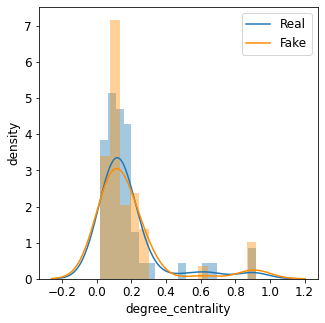

In [73]:
# just to ignore warnings in output
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")   
plt.figure(figsize=(5,5))
real = df.degree_centralities[our_choice]
syn = list(dict(nx.degree_centrality(G)).values())
sns.distplot(real)
sns.distplot(syn,color='darkorange')
plt.legend(['Real','Fake'],fontsize=12)
plt.xlabel('degree_centrality', fontsize=12)
plt.ylabel('density', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

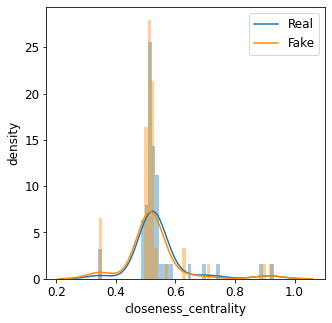

In [75]:
plt.figure(figsize=(5,5))
real = df.closeness_centralities[our_choice]
syn = list(dict(nx.closeness_centrality(G)).values())
sns.distplot(real)
sns.distplot(syn,color='darkorange')
plt.legend(['Real','Fake'],fontsize=12)
plt.xlabel('closeness_centrality', fontsize=12)
plt.ylabel('density', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

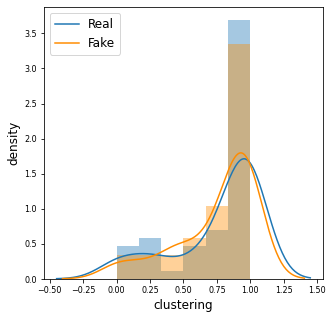

In [76]:
plt.figure(figsize=(5,5))
real = df.clustering_coefficients[our_choice]
syn = list(dict(nx.clustering(G)).values())
sns.distplot(real)
sns.distplot(syn,color='darkorange')
plt.legend(['Real','Fake'],fontsize=12)
plt.xlabel('clustering', fontsize=12)
plt.ylabel('density', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

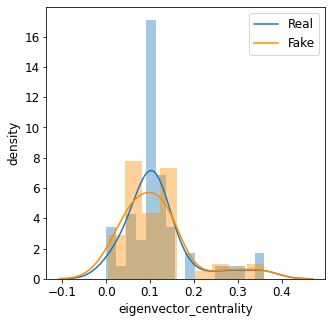

In [77]:
plt.figure(figsize=(5,5))
real = df.eigenvector_centralities[our_choice]
syn = list(dict(nx.eigenvector_centrality(g)).values())
sns.distplot(real)
sns.distplot(syn,color='darkorange')
plt.legend(['Real','Fake'],fontsize=12)
plt.xlabel('eigenvector_centrality', fontsize=12)
plt.ylabel('density', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()